In [1]:
# Import the dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-33.278182718400636 -98.53055410060836
-10.71404604220018 99.77148556101668
-14.416533275870066 18.878865839175575
63.86566393773151 28.064060096760556
47.339946402178185 -29.28902462668853
-39.65855563934879 138.21082688766097
66.35482392612212 -89.72463319177096
-47.210686375964535 26.917910442466734
-20.769957132568607 -51.75091862511883
-34.266995990649136 15.28206530167094
-64.53529518348675 -18.74930305166589
56.44668204061858 168.5051156011079
23.626894461943053 1.0867507539667258
-78.78038194103999 -141.69666495087085
42.3701555319777 155.66042716495758
36.25394580303005 -123.04979851046387
-27.952393725618116 47.96448630502621
84.4994133580004 170.40122710487088
82.52640387755241 -137.82371090086644
-87.28329333597448 -81.13924423825108
40.96341311350923 18.995201671478583
41.41646272492096 -101.82131026723313
-47.45116198025907 171.30580701170902
57.27826600986171 159.1998681206593
-4.186671185360183 101.73572896181906
-49.384055127714774 144.76177690027419
19.761197170322504

28.351642149191022 112.05652747867401
17.2387571666804 -89.18710806600917
34.28083869302962 -64.5190921823126
2.425506877660908 116.15448720875168
-75.44180850120473 20.56875419535885
30.300190362439366 -10.604830803196734
-62.16413116881216 116.24036119140806
-9.394947055939923 -97.29084290291422
-5.903535450074855 -134.3073255023183
-66.35572824834719 166.32091340331982
43.935769387711616 155.40161907159768
-39.48278803902953 -79.5874787803208
51.15808887803212 179.55688474519053
28.703746484605134 -77.81743813681543
-42.46514855987998 70.57235492869941
68.27861413529712 -20.858166625375503
-74.52525499997913 -41.02329997298918
-52.33033214074081 -34.13450087402825
-1.6751366133475187 15.574900230070995
36.38246961578875 15.714449467894127
-33.70661222036953 100.58327030574054
-47.0181713113408 179.69807222946076
35.049903659487114 65.53937355680844
-39.19069598978633 51.5586401577913
42.3913214661587 23.74446599922038
41.953115615883064 -64.6876147059479
52.845353455580295 -51.93840

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities

cities = []


# Identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    
    # If city is unique, add it to the cities list
    
    if city not in cities:
        
        cities.append(city)
        
        
# Print the city count to confirm sufficient count

len(cities)

620

In [7]:
# Import the requests library

import requests

In [8]:
# Import the API key

from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 

import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.

city_data = []
record_count = 1
set_count = 1


# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Loop through all the cities in the list.

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

        
    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1

    # Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
       
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    
    except:
        
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | menongue
Processing Record 4 of Set 1 | kajaani
Processing Record 5 of Set 1 | lagoa
Processing Record 6 of Set 1 | mount gambier
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tres lagoas
Processing Record 10 of Set 1 | saldanha
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | tessalit
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 16 of Set 1 | pacific grove
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | pevek
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | durres
Processing Record 22 o

Processing Record 38 of Set 4 | belmonte
Processing Record 39 of Set 4 | batangafo
Processing Record 40 of Set 4 | clyde river
Processing Record 41 of Set 4 | ponta do sol
Processing Record 42 of Set 4 | laguna
Processing Record 43 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 44 of Set 4 | wukari
Processing Record 45 of Set 4 | bethel
Processing Record 46 of Set 4 | cururupu
Processing Record 47 of Set 4 | luanda
Processing Record 48 of Set 4 | berdigestyakh
Processing Record 49 of Set 4 | kieta
Processing Record 50 of Set 4 | borba
Processing Record 1 of Set 5 | castro
Processing Record 2 of Set 5 | kindu
Processing Record 3 of Set 5 | baoro
Processing Record 4 of Set 5 | memari
Processing Record 5 of Set 5 | cayhagan
Processing Record 6 of Set 5 | saratovskaya
Processing Record 7 of Set 5 | along
Processing Record 8 of Set 5 | naze
Processing Record 9 of Set 5 | sao joao da barra
Processing Record 10 of Set 5 | kaitangata
Processing Record 11 of Set 5 | kashi
Pr

Processing Record 20 of Set 8 | barra do garcas
Processing Record 21 of Set 8 | veraval
Processing Record 22 of Set 8 | la ronge
Processing Record 23 of Set 8 | autazes
Processing Record 24 of Set 8 | fort nelson
Processing Record 25 of Set 8 | manjakandriana
Processing Record 26 of Set 8 | kirensk
Processing Record 27 of Set 8 | san isidro
Processing Record 28 of Set 8 | beyneu
Processing Record 29 of Set 8 | natal
Processing Record 30 of Set 8 | bilibino
Processing Record 31 of Set 8 | derzhavinsk
Processing Record 32 of Set 8 | coahuayana
Processing Record 33 of Set 8 | uniao da victoria
City not found. Skipping...
Processing Record 34 of Set 8 | turayf
Processing Record 35 of Set 8 | gigmoto
Processing Record 36 of Set 8 | christchurch
Processing Record 37 of Set 8 | namatanai
Processing Record 38 of Set 8 | bowen
Processing Record 39 of Set 8 | zabaykalsk
Processing Record 40 of Set 8 | sechura
Processing Record 41 of Set 8 | sheltozero
Processing Record 42 of Set 8 | ostrovnoy
Pr

Processing Record 8 of Set 12 | paamiut
Processing Record 9 of Set 12 | aktash
Processing Record 10 of Set 12 | teguldet
Processing Record 11 of Set 12 | coihaique
Processing Record 12 of Set 12 | suchedniow
Processing Record 13 of Set 12 | beni suef
Processing Record 14 of Set 12 | guozhen
Processing Record 15 of Set 12 | katsiveli
City not found. Skipping...
Processing Record 16 of Set 12 | buraydah
Processing Record 17 of Set 12 | palana
Processing Record 18 of Set 12 | kohima
Processing Record 19 of Set 12 | catungan
Processing Record 20 of Set 12 | henties bay
Processing Record 21 of Set 12 | banda aceh
Processing Record 22 of Set 12 | fomboni
Processing Record 23 of Set 12 | rojhan
Processing Record 24 of Set 12 | pahalgam
Processing Record 25 of Set 12 | westport
Processing Record 26 of Set 12 | khorramabad
Processing Record 27 of Set 12 | ruteng
Processing Record 28 of Set 12 | aklavik
Processing Record 29 of Set 12 | ormara
Processing Record 30 of Set 12 | adrar
Processing Rec

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,47.12,75,19,3.06,CL,2022-07-07 00:18:07
1,Bengkulu,-3.8004,102.2655,77.58,84,95,5.30,ID,2022-07-07 00:13:50
2,Menongue,-14.6585,17.6910,51.13,54,21,5.03,AO,2022-07-07 00:18:07
3,Kajaani,64.2273,27.7285,50.05,100,0,2.30,FI,2022-07-07 00:18:07
4,Lagoa,39.0500,-27.9833,64.83,81,100,13.00,PT,2022-07-07 00:18:08
5,Mount Gambier,-37.8333,140.7667,53.11,63,73,10.11,AU,2022-07-07 00:18:09
6,Thompson,55.7435,-97.8558,71.51,33,100,6.64,CA,2022-07-07 00:15:11
7,Port Elizabeth,-33.9180,25.5701,52.09,93,0,1.14,ZA,2022-07-07 00:18:09
8,Tres Lagoas,-20.7511,-51.6783,70.56,38,100,6.67,BR,2022-07-07 00:18:10
9,Saldanha,-33.0117,17.9442,42.85,85,36,9.28,ZA,2022-07-07 00:18:11


In [13]:
# Reorder the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
# Print out new dataframe

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2022-07-07 00:18:07,-37.6167,-73.6500,47.12,75,19,3.06
1,Bengkulu,ID,2022-07-07 00:13:50,-3.8004,102.2655,77.58,84,95,5.30
2,Menongue,AO,2022-07-07 00:18:07,-14.6585,17.6910,51.13,54,21,5.03
3,Kajaani,FI,2022-07-07 00:18:07,64.2273,27.7285,50.05,100,0,2.30
4,Lagoa,PT,2022-07-07 00:18:08,39.0500,-27.9833,64.83,81,100,13.00
5,Mount Gambier,AU,2022-07-07 00:18:09,-37.8333,140.7667,53.11,63,73,10.11
6,Thompson,CA,2022-07-07 00:15:11,55.7435,-97.8558,71.51,33,100,6.64
7,Port Elizabeth,ZA,2022-07-07 00:18:09,-33.9180,25.5701,52.09,93,0,1.14
8,Tres Lagoas,BR,2022-07-07 00:18:10,-20.7511,-51.6783,70.56,38,100,6.67
9,Saldanha,ZA,2022-07-07 00:18:11,-33.0117,17.9442,42.85,85,36,9.28


In [15]:
# Create the output file (CSV)

output_data_file = "weather_data/cities.csv"


# Export the City_Data into a CSV

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DatFrame for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

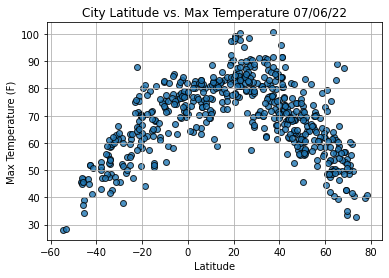

In [17]:
# Import time module

import time


# Build the scatter plot for latitude vs. max temperature

plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties

plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure

plt.savefig("weather_data/Fig1.png")


# Show plot

plt.show()

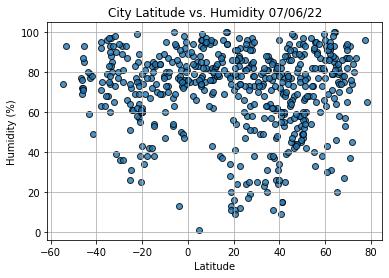

In [18]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig2.png")


# Show plot.

plt.show()

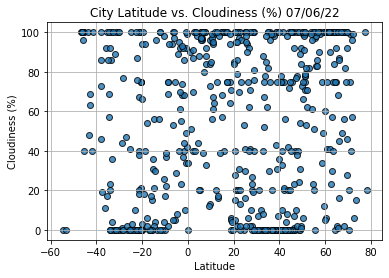

In [19]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig3.png")


# Show plot.

plt.show()

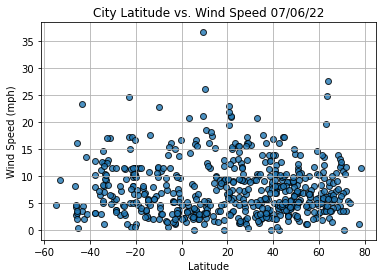

In [20]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig4.png")


# Show plot.

plt.show()

In [23]:
# Import linregress

from scipy.stats import linregress


# Create a function to create linear regression on the weather data and plot a regression line and equation with data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    
    # Calculate the regression line "y values" from the slope and intercept
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
   
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    plt.show()

In [24]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

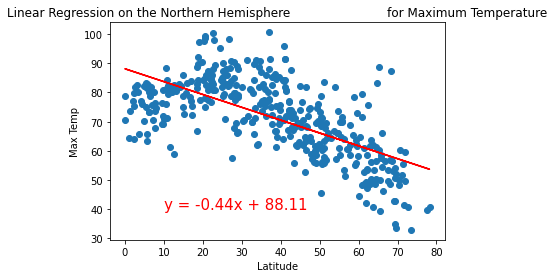

In [25]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

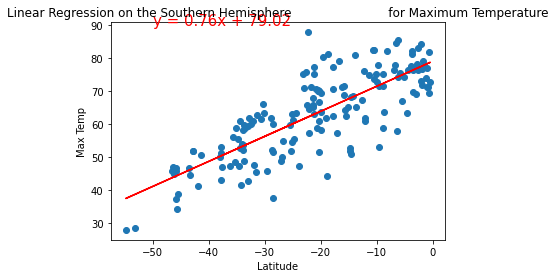

In [26]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

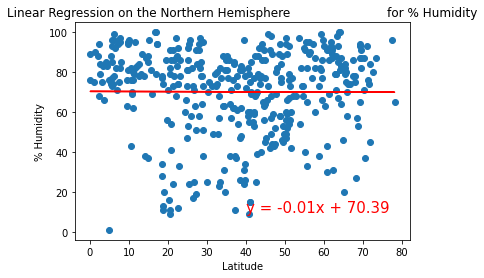

In [27]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

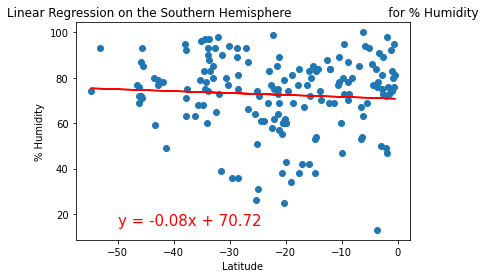

In [28]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

#### Module 6.4.4 Skilldrill

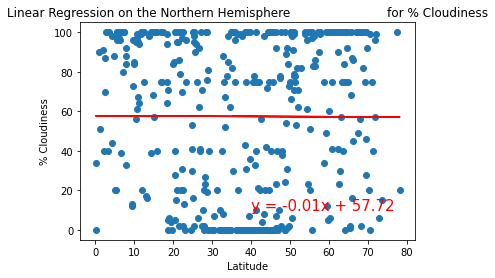

In [30]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

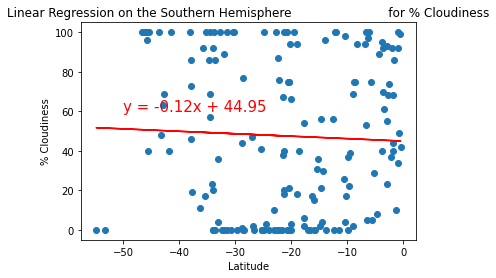

In [31]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

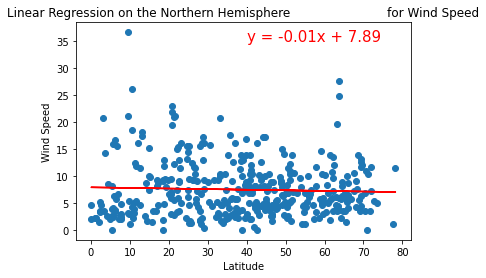

In [32]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))